# PREPROCESSING AND EDA PART 

## CONTENTS

__1.GETTING FAMILIAR WITH THE DATASET__
    
        
__2.INITIAL EDA__


__3.DATA CLEANING, PREPROCESSING AND EDA__
        
    3.1 HANDLING MISSING VALUES
    3.2 OUTLIERS AND HIGH-LEVERAGE POINTS
    3.3 HISTOGRAMS
    3.4 DUMMY VARIABLES AND CASTING AS APPROPRIATE TYPE
    3.5 COUNTSPLOTS AND BOXPLOTS
    3.6 CORRELATION MATRIX
    3.7 TRAIN-TEST SPLIT
      

## 1. GETTING FAMILIAR WITH THE DATASET

The first step involves comprehensively grasping the data structure and discerning the types of information contained within, including numeric values or text strings.

Moreover, it's crucial to handle any missing values that might exist and to preprocess the dataset adequately in preparation for machine learning models.

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__Importing data__

In [2]:
data= pd.read_csv('Heart.csv', index_col='Unnamed: 0') 
df = data.copy()
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


## 2. INITIAL EDA

In [3]:
# Dimensions of the dataset
df.shape

(303, 14)

In [4]:
df.describe() # Preliminary examination of the data.

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


It's possible that the variables "Chol" and "Oldpeak" might include outliers or extreme values.

In [5]:
df.isnull().sum() # Checking for missing values

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

A minimal number of missing values are present. We intend to replace them with either the mean or mode value.

In [6]:
df.dtypes # Checking the data types

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

The variables "ChestPain", "Thal," and "AHD" currently hold data as 'object' types. We need to convert them to a format that machine learning algorithms can utilize. 

### __Question :__ Which variables are quantitative and which are categorical?

In [7]:
# Let's see the unique values of each variable.
for i in df.columns:
    print(i + ' : ', df[i].unique())
    print("")
    print("")
  
    

Age :  [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]


Sex :  [1 0]


ChestPain :  ['typical' 'asymptomatic' 'nonanginal' 'nontypical']


RestBP :  [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]


Chol :  [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 23

The variables 'Age', 'RestBP', 'Chol', 'MaxHR', and 'Oldpeak' appear to be continuous, whereas the remaining variables seem to be categorical.

## 3. DATA CLEANING, PREPROCESSING AND EDA

### 3.1 HANDLING MISSING VALUES

In [8]:
# Replacing every nan in the dataset with the mode, since the variables that contain nans are categorical

for column in df.columns:
    most_frequent_entry = df[column].mode()[0]  # Calculate the most frequent entry in the column
    df[column].fillna(most_frequent_entry, inplace=True)

In [9]:
df.isnull().sum() # Checking for missing values. Nans have been replaced with mode values

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

### 3.2 OUTLIERS AND HIGH-LEVERAGE POINTS

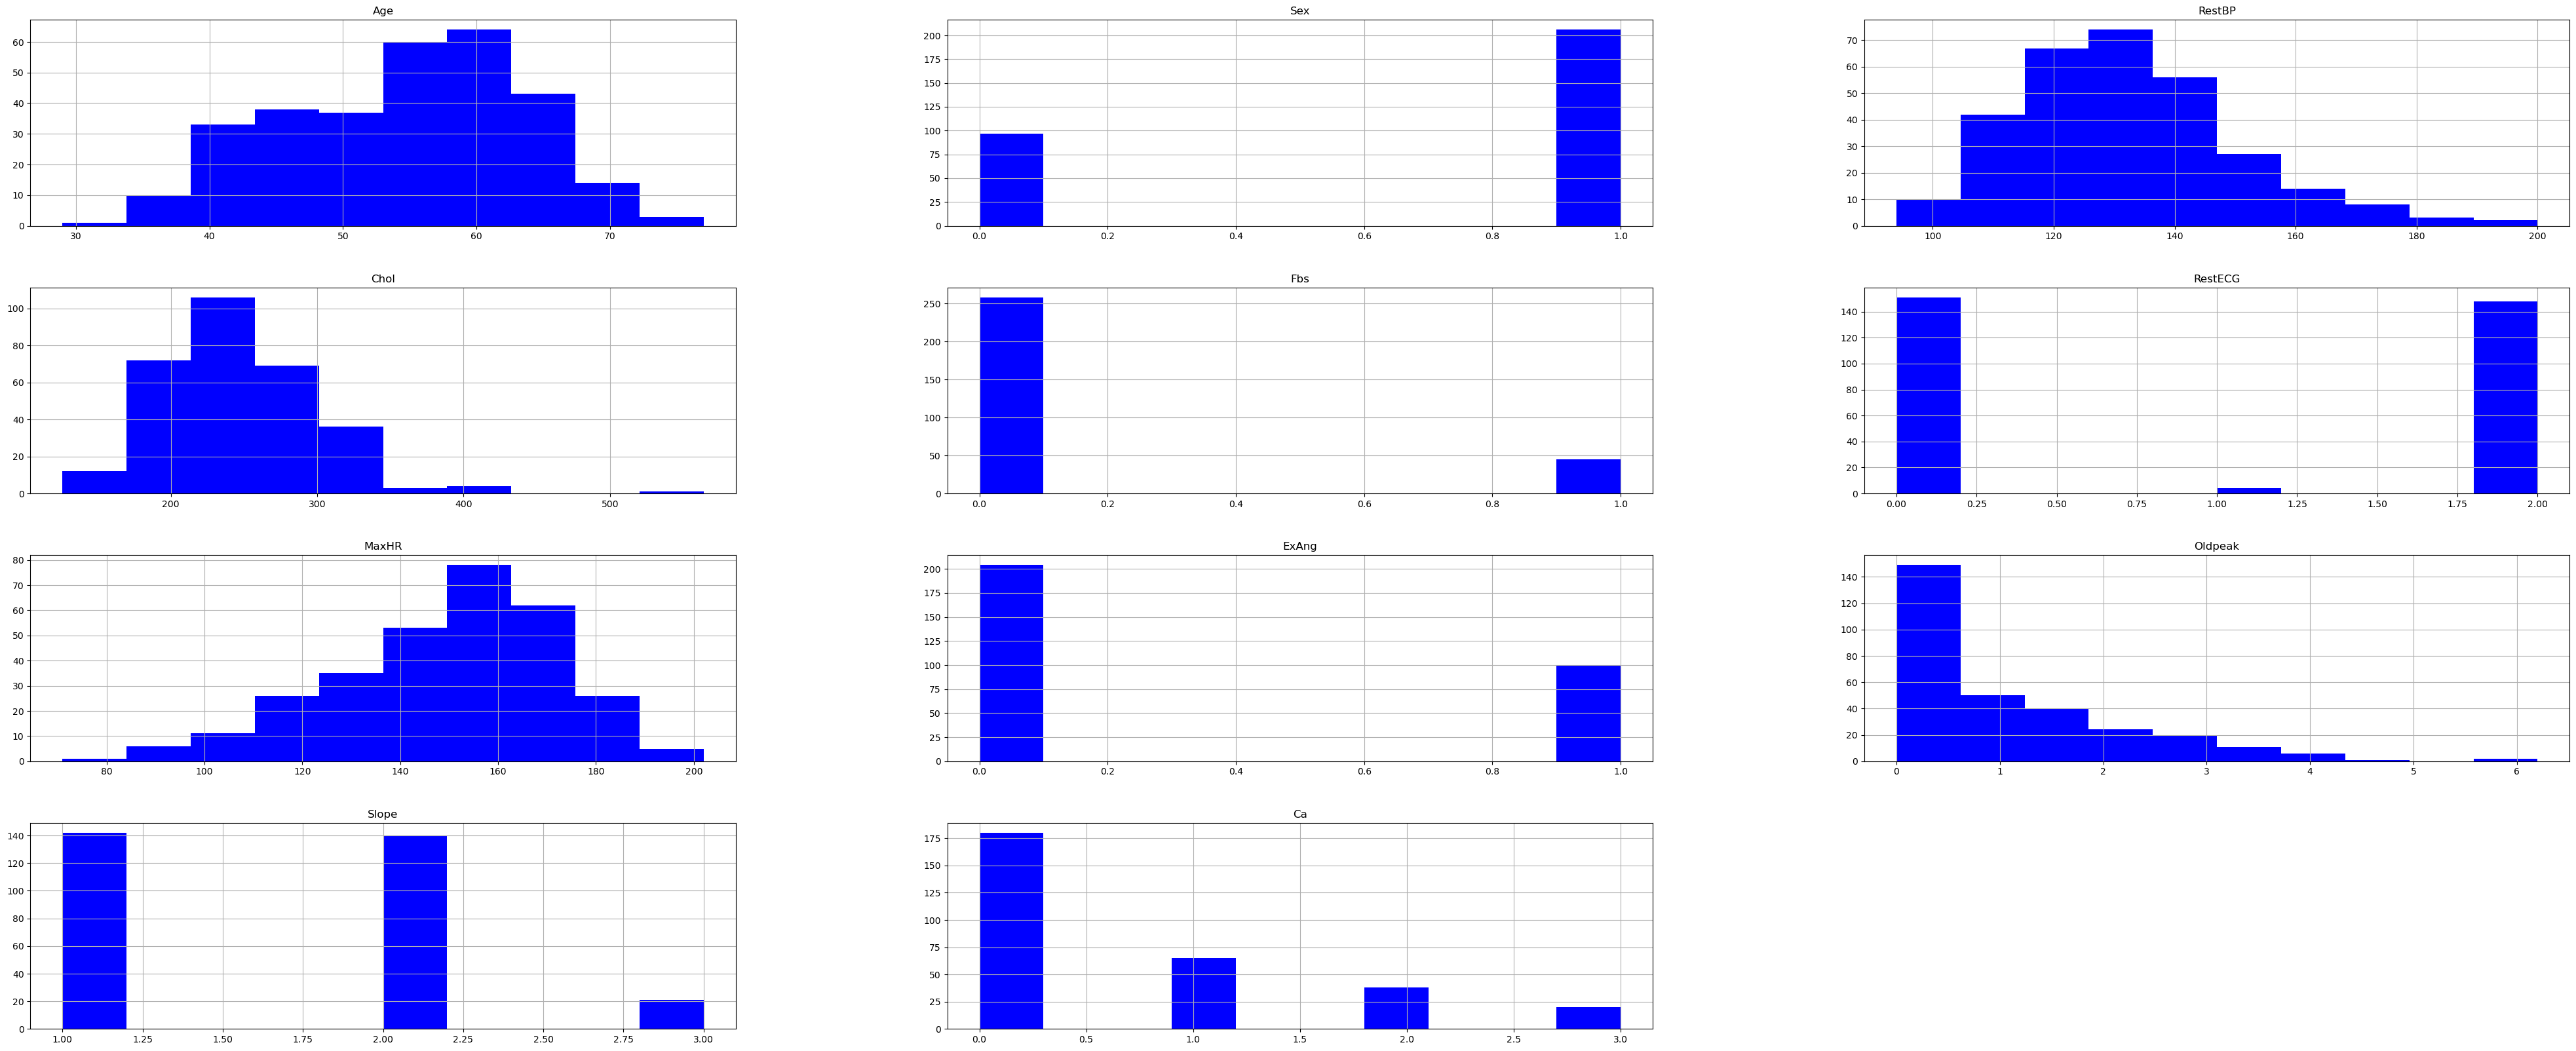

In [10]:
# Preliminary examination with Histograms
df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10, color = 'blue')
plt.show()

We've identified some potentially extreme values in the "Chol" and "Oldpeak" variables, particularly those at the higher end. We'll treat them as outliers and remove them from the dataset.

In [11]:
# Deleting the extreme values manually

df = df[df['Chol']< 500]
df = df[df['Oldpeak']< 5]

# Dimensions of the dataset
df.shape


(300, 14)

Three entries were dropped

### 3.3 HISTOGRAMS

In [12]:
# Creating a palette for the plots
color_list = ["firebrick", "red", "orangered", "chocolate", "sandybrown", "darkorange", "orange", "gold", "limegreen",
                  "deepskyblue", "navy", "darkorchid", "magenta", "greenyellow", "yellowgreen", "forestgreen", "lime",
                  "lightseagreen", "cyan", "dodgerblue", "crimson", "deeppink", "purple", "blue",
                  "salmon", "olive", "teal", "skyblue", "indigo", "brown", "sienna", "peru", "maroon", "tan"]

In [13]:
# 1. Function that diplays histogram of the variable
def display_variable_hist(Variable, i):
    
    sns.set_style("white")
    
    plt.hist(df[Variable], bins = 20, color = color_list[i])
    
    plt.title(label = "Distribution of " + Variable, fontsize = 14, weight = 'bold')
    
    sns.despine()
    
    plt.show()

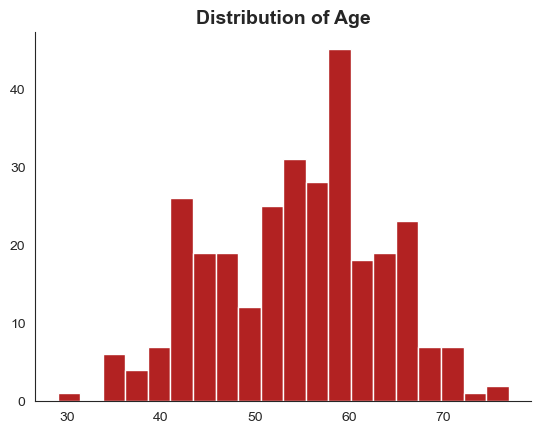

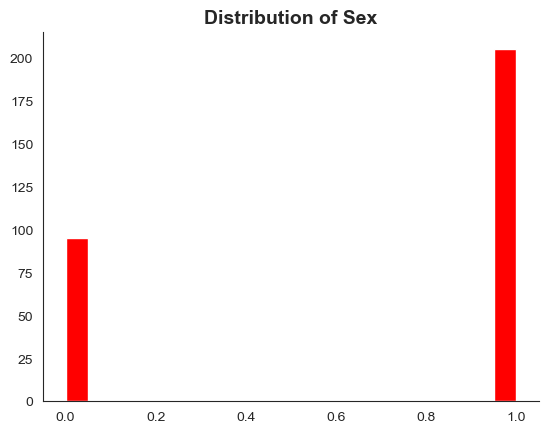

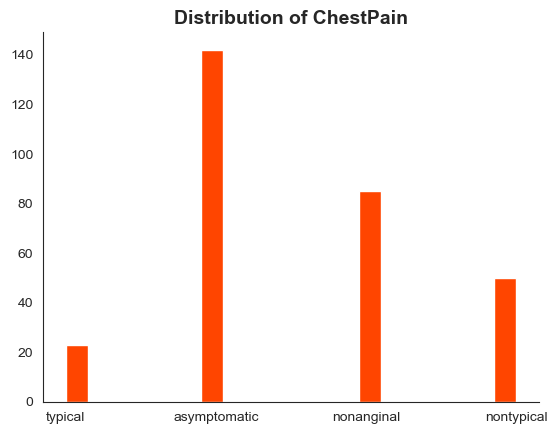

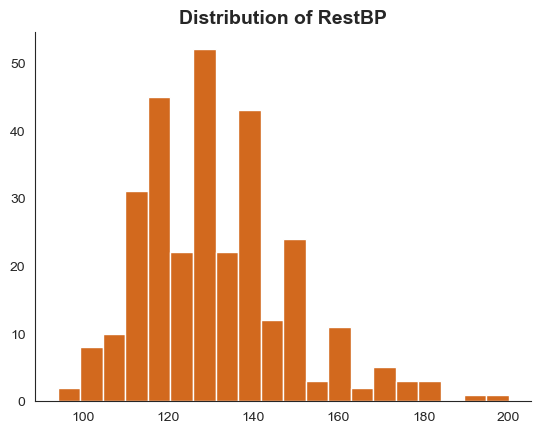

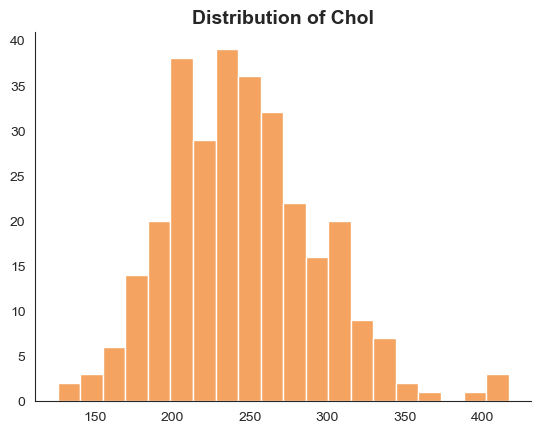

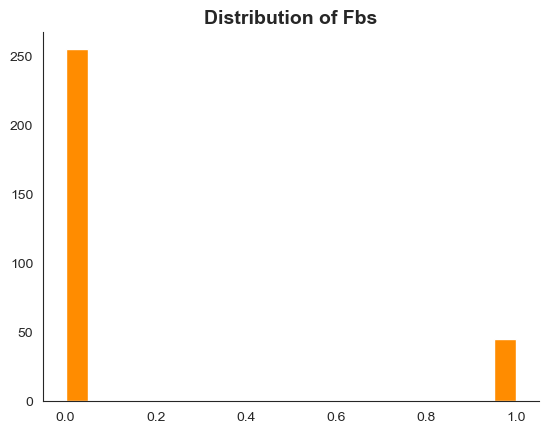

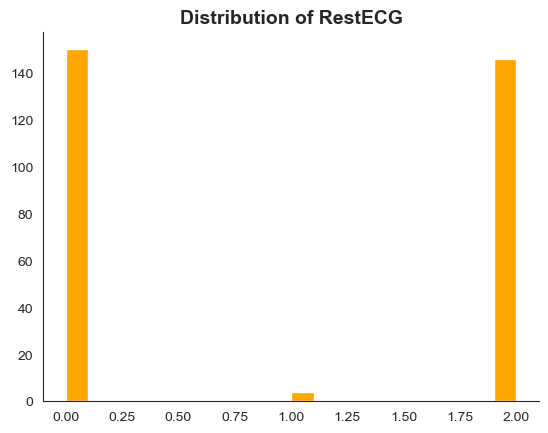

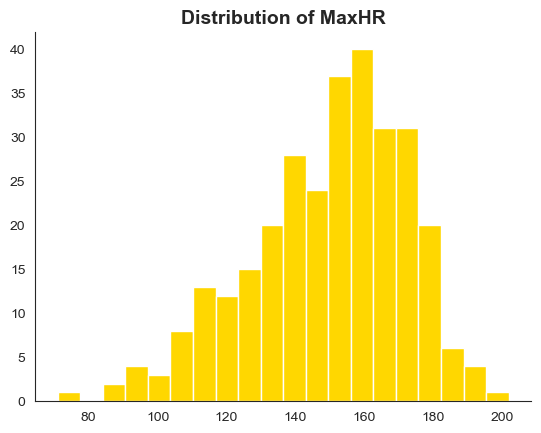

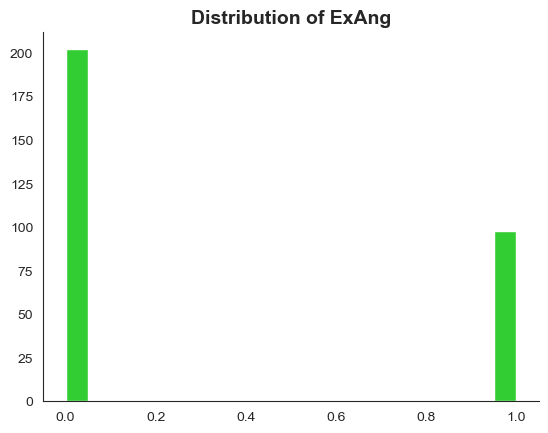

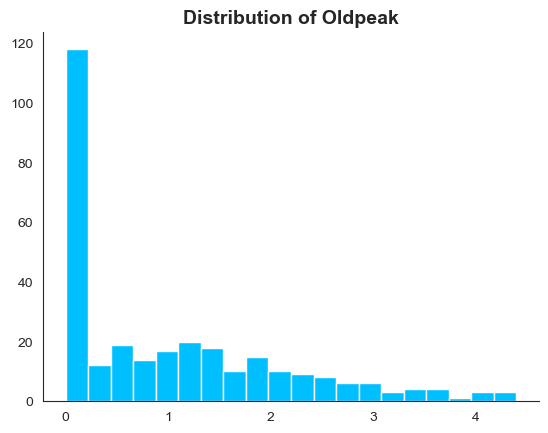

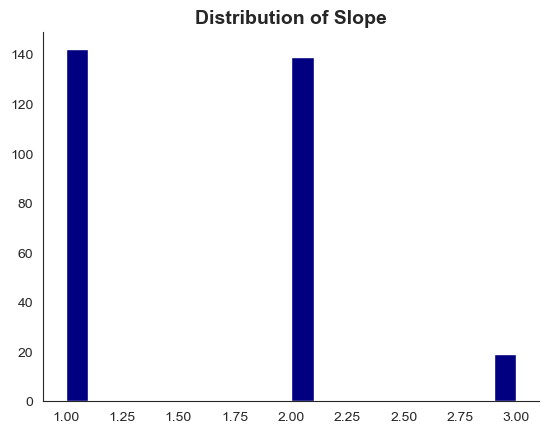

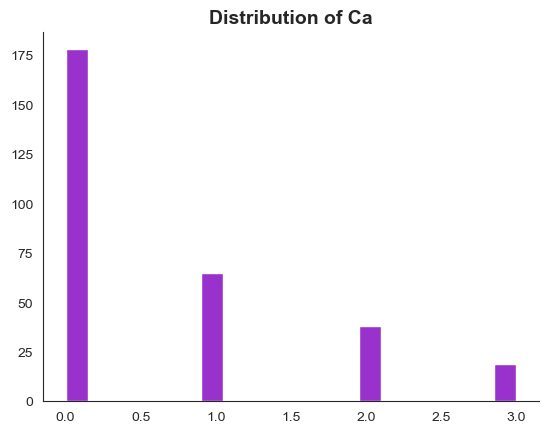

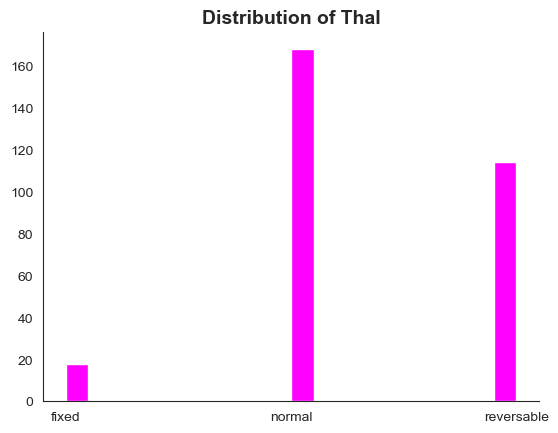

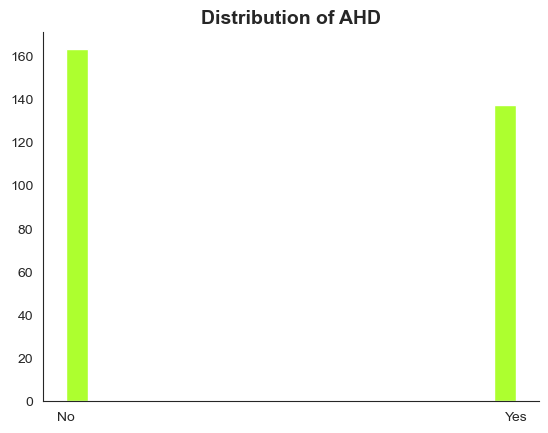

In [14]:
# Displaying the histogram of each varaible
for i in range(0,len(df.columns)):
    display_variable_hist(df.columns[i], i)

* The variables 'Age', 'RestBP', 'Chol', and 'MaxHR' appear to follow a roughly normal distribution, although there might be a slight skewness present.

* 'Oldpeak' does not appear to follow a normal distribution.

* There appears to be significant imbalance among the different categories in most categorical variables.

### 3.4 DUMMY VARIABLES AND CASTING AS APPROPRIATE TYPE

In [15]:
df = pd.get_dummies(df) # , drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,1,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,0,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0,1,0


In [16]:
df.shape

(300, 20)

In [17]:
df.dtypes # Checking the data types

Age                         int64
Sex                         int64
RestBP                      int64
Chol                        int64
Fbs                         int64
RestECG                     int64
MaxHR                       int64
ExAng                       int64
Oldpeak                   float64
Slope                       int64
Ca                        float64
ChestPain_asymptomatic      uint8
ChestPain_nonanginal        uint8
ChestPain_nontypical        uint8
ChestPain_typical           uint8
Thal_fixed                  uint8
Thal_normal                 uint8
Thal_reversable             uint8
AHD_No                      uint8
AHD_Yes                     uint8
dtype: object

In [18]:
df['Ca'] = df['Ca'].astype('int64')

In [19]:
for i in ['ChestPain_nonanginal','ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal','Thal_reversable', 'AHD_Yes']:
    df[i] = df[i].astype('int64')

In [20]:
df.dtypes # Checking the data types

Age                         int64
Sex                         int64
RestBP                      int64
Chol                        int64
Fbs                         int64
RestECG                     int64
MaxHR                       int64
ExAng                       int64
Oldpeak                   float64
Slope                       int64
Ca                          int64
ChestPain_asymptomatic      uint8
ChestPain_nonanginal        int64
ChestPain_nontypical        int64
ChestPain_typical           int64
Thal_fixed                  uint8
Thal_normal                 int64
Thal_reversable             int64
AHD_No                      uint8
AHD_Yes                     int64
dtype: object

In [21]:
# Renaming the target column
df.rename(columns={"AHD_Yes": "AHD"}, inplace= True)

In [22]:
# Diplaying the name of target
df.columns[16]

'Thal_normal'

### 3.5 COUNTSPLOTS AND BOXPLOTS

To assess the relationship, if any, between the predictors and the target variable, we will utilize scatterplots for the numerical predictors and boxplots for the categorical predictors.

In [23]:
Num_variables = ['Age', 'RestBP', 'Chol', 'MaxHR','Oldpeak']
Cat_variables = ['Sex', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca', 'ChestPain_nonanginal','ChestPain_nontypical', 
                 'ChestPain_typical', 'Thal_normal','Thal_reversable']

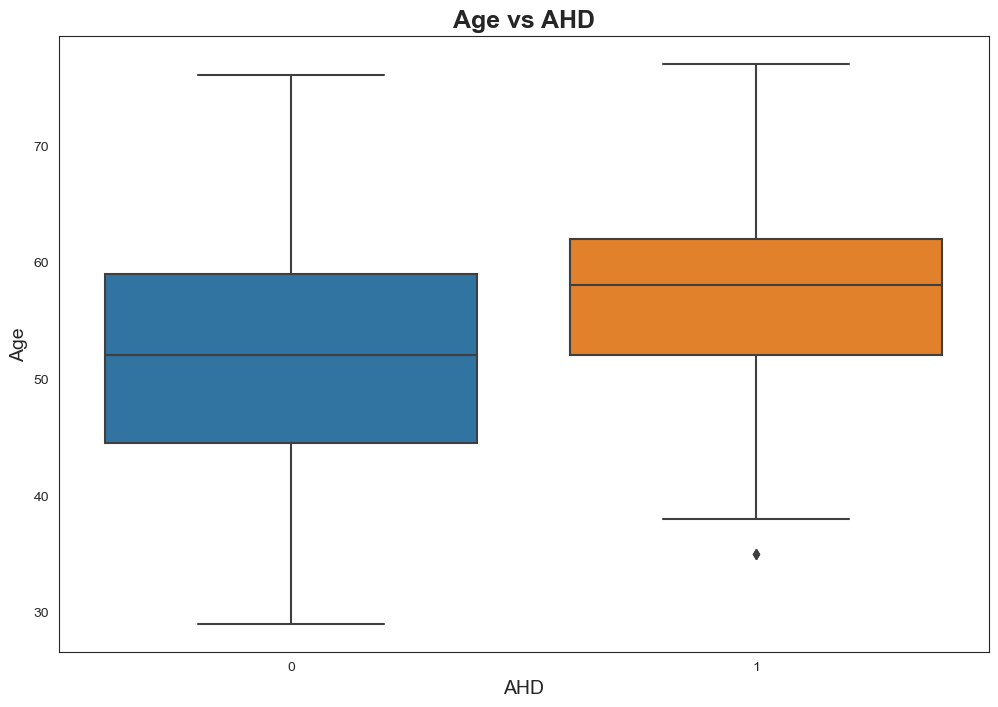

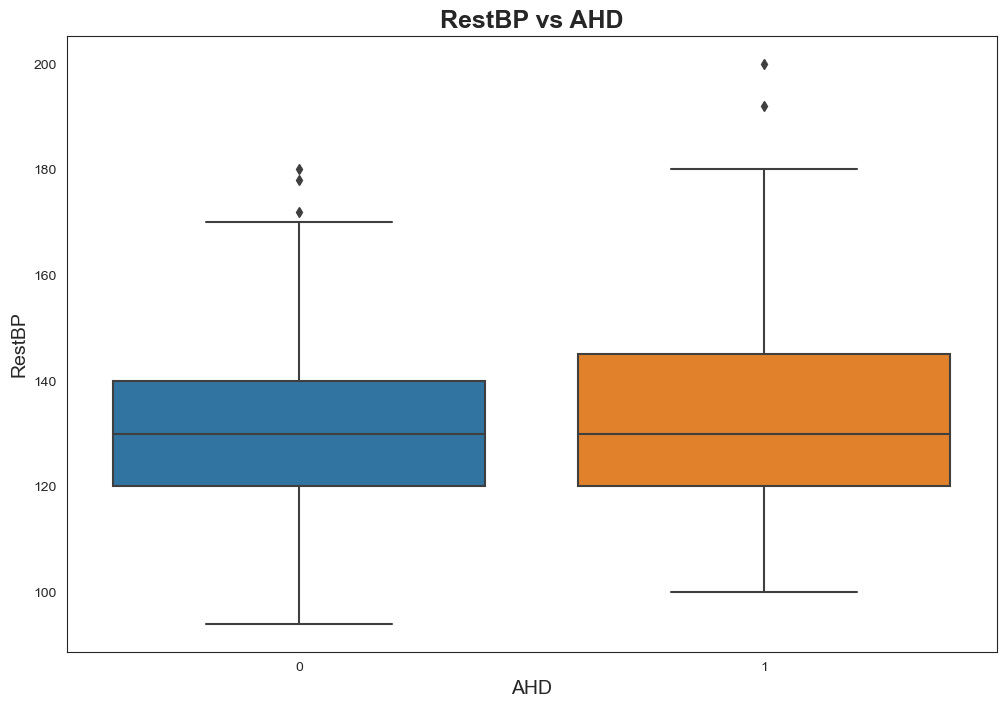

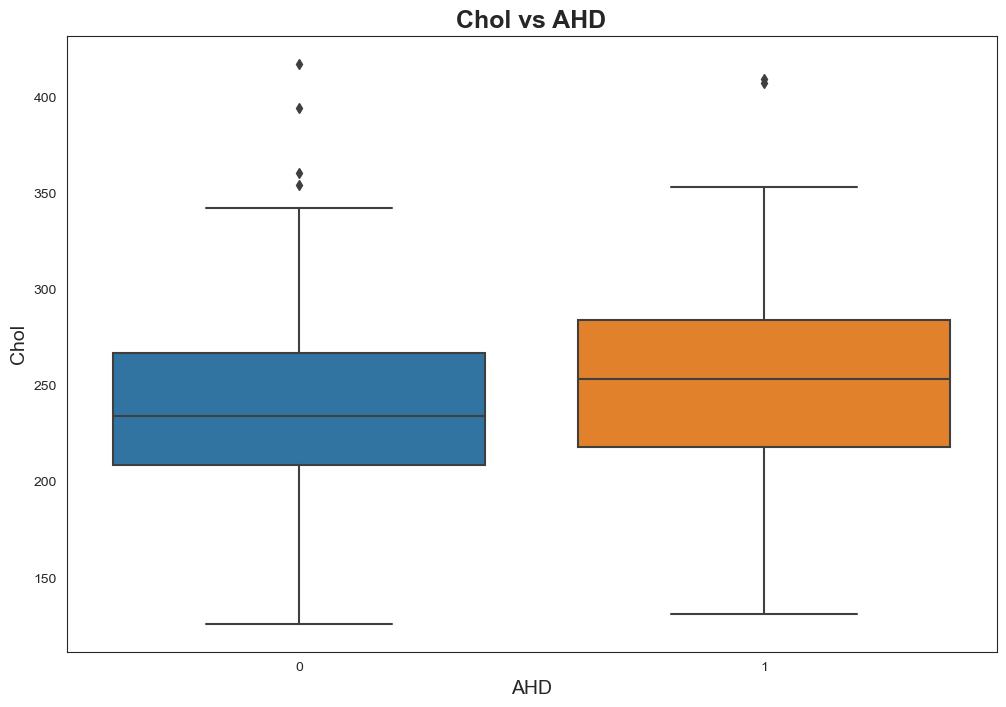

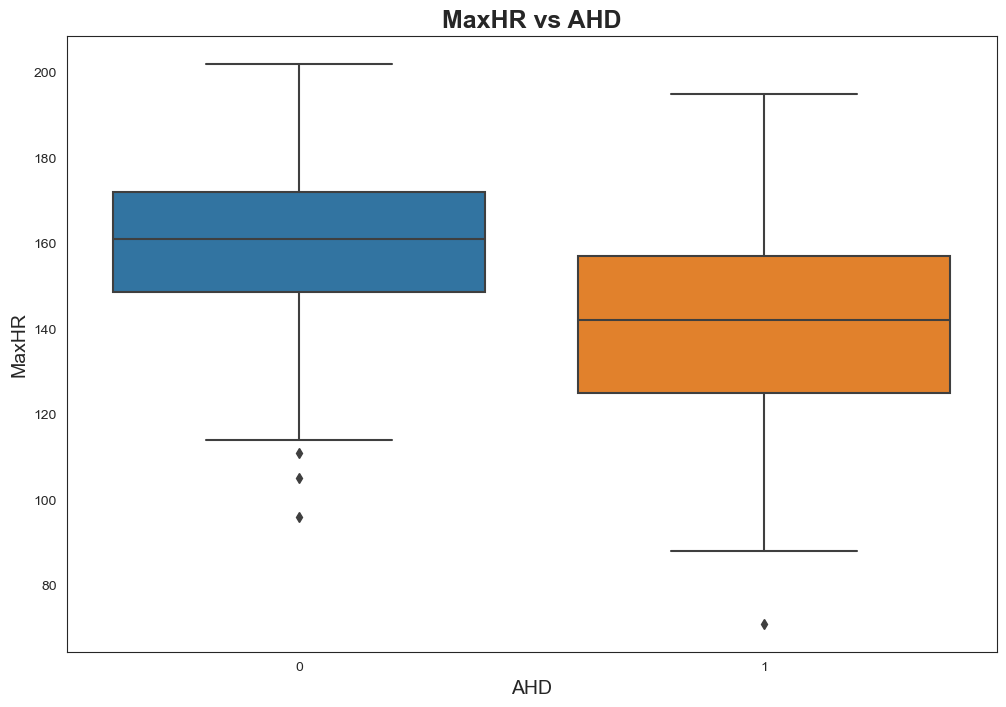

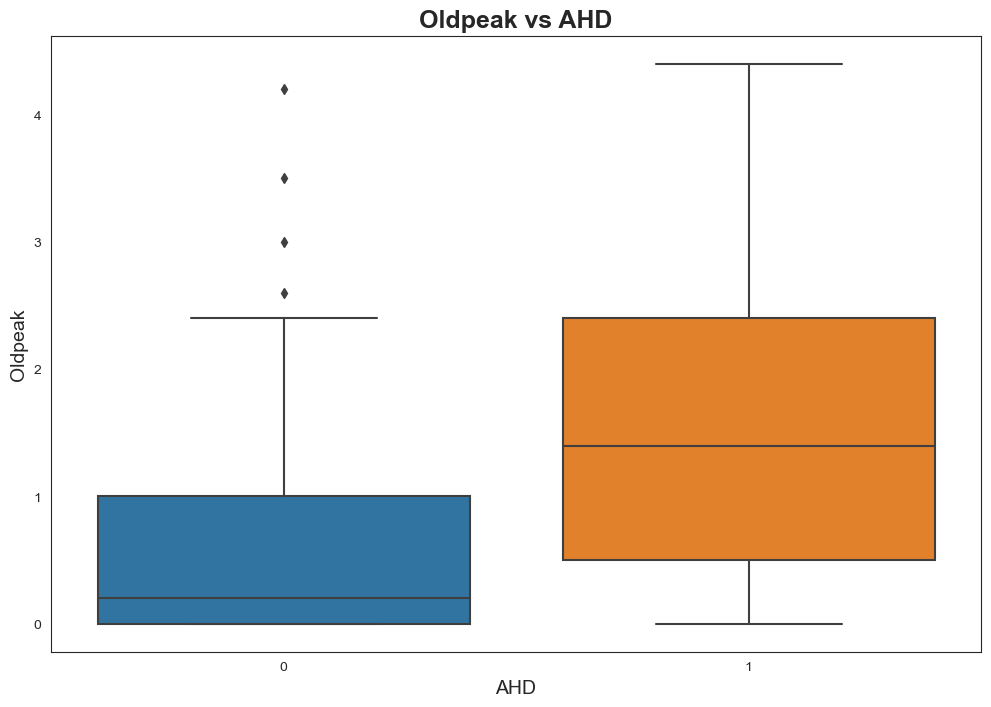

In [24]:

for i in Num_variables:
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='AHD', y= i, width=0.8)
    plt.title(i + ' vs AHD', fontsize = 18, weight = 'bold')
    plt.xlabel('AHD', fontsize = 14)
    plt.ylabel(i, fontsize = 14)
    plt.show()

It appears that all the numerical predictors exhibit some degree of relationship with the target variable, ranging from small to significant.

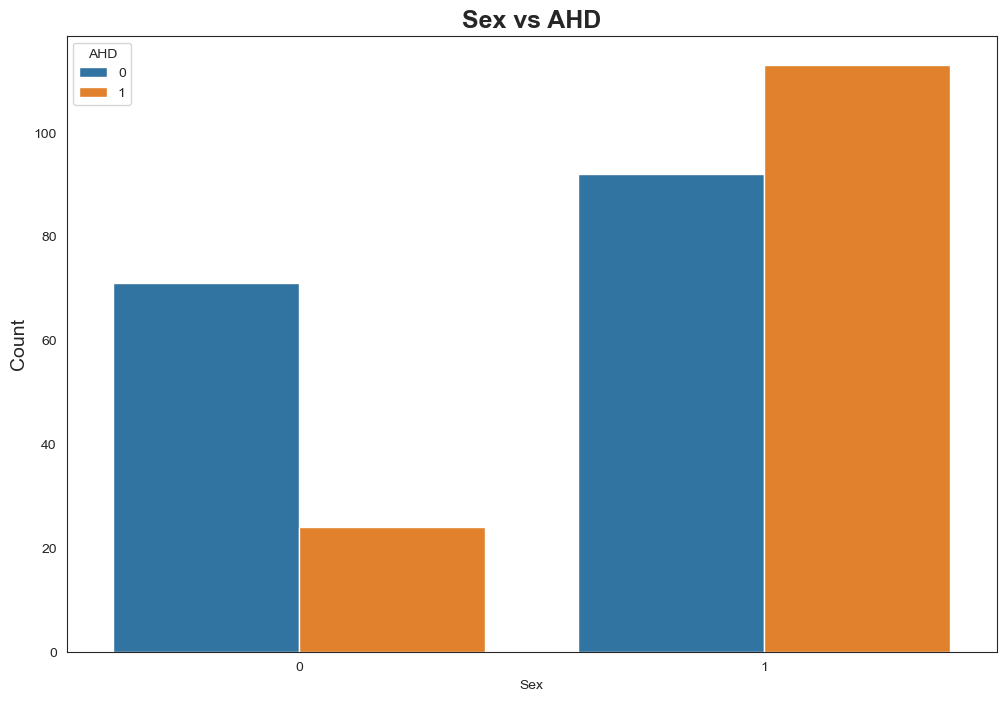

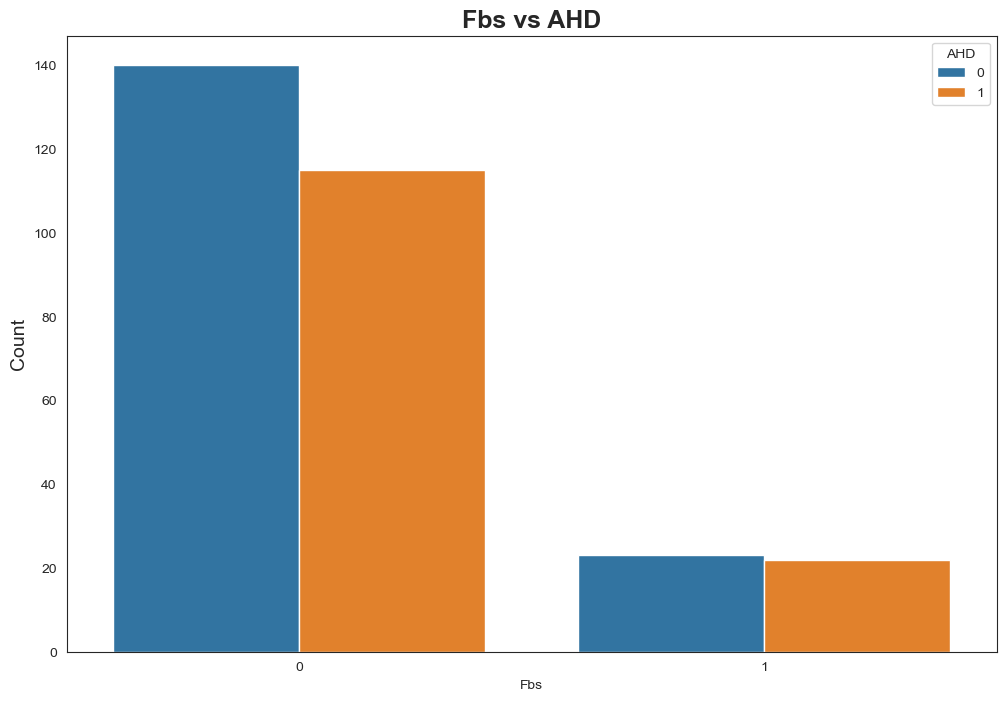

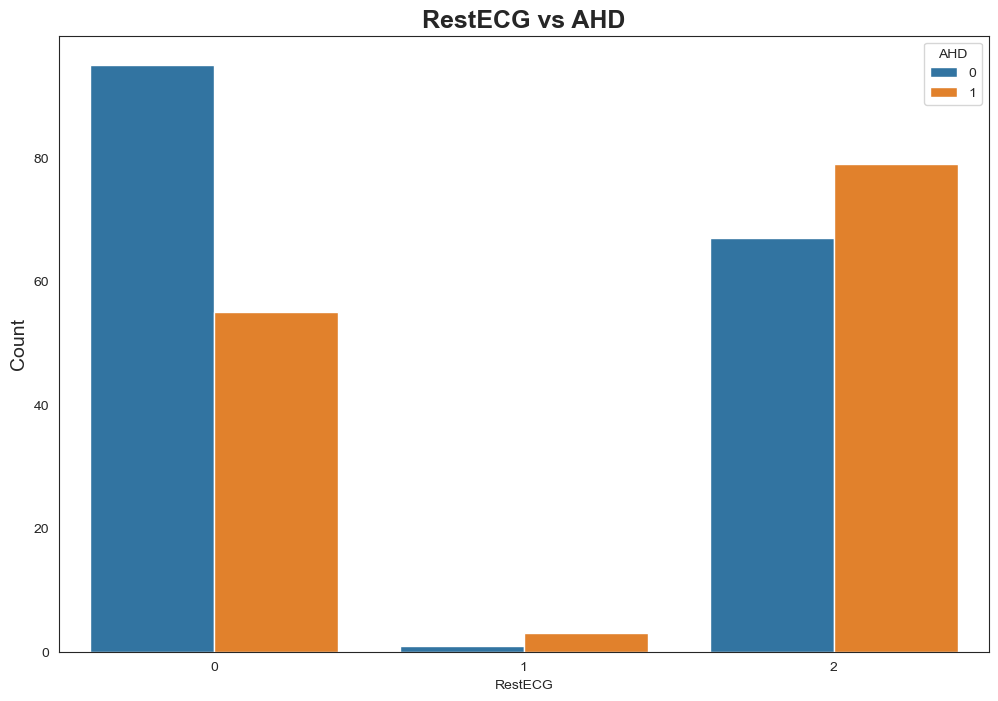

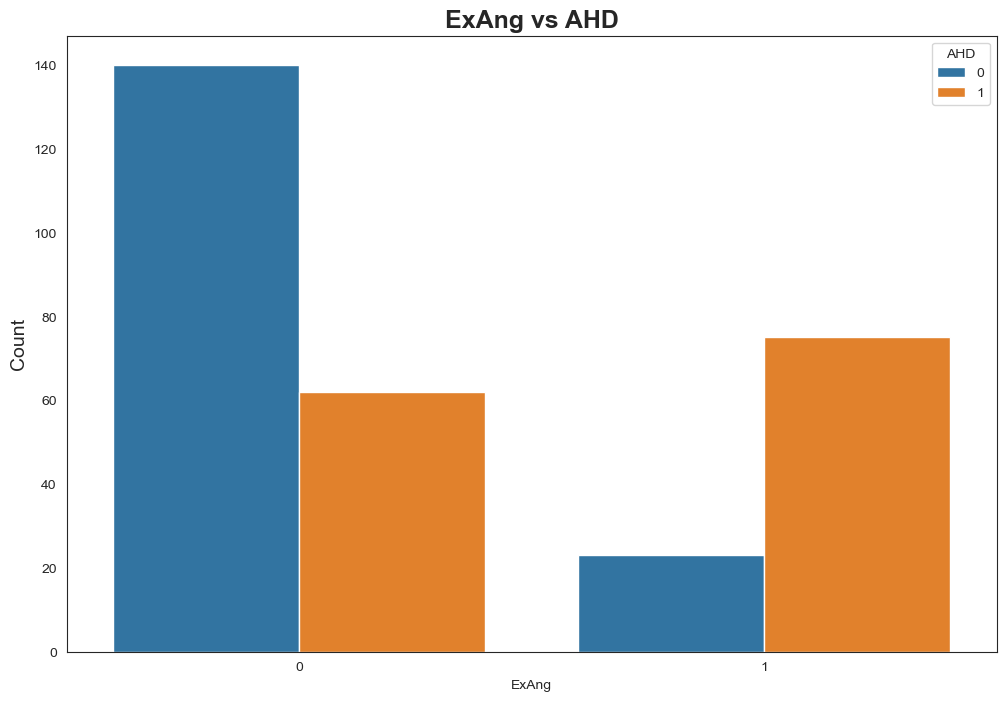

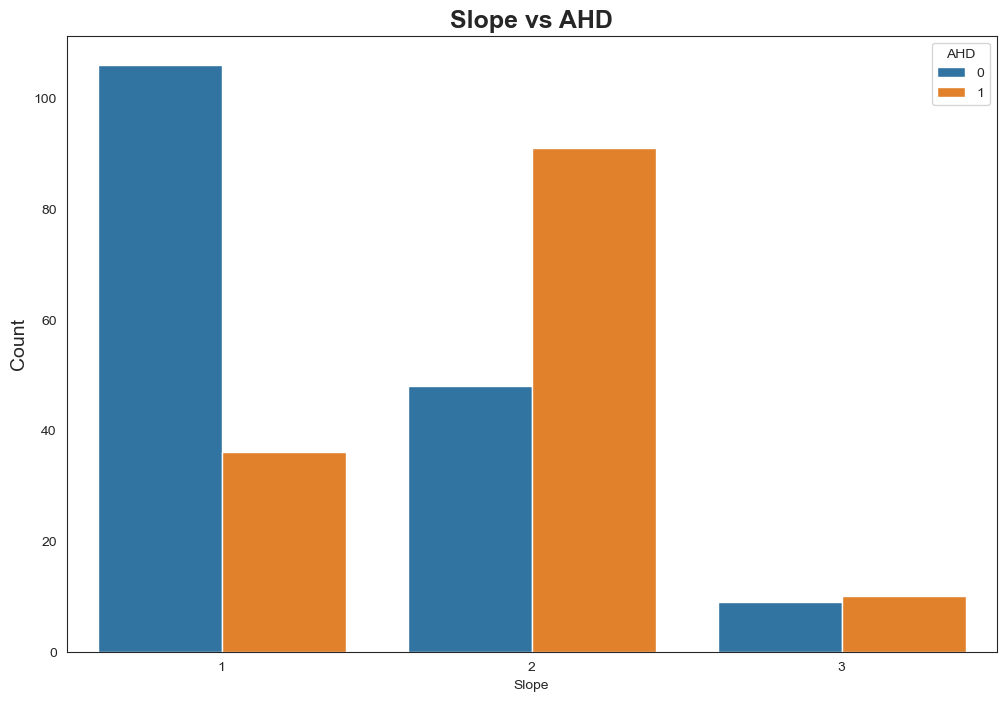

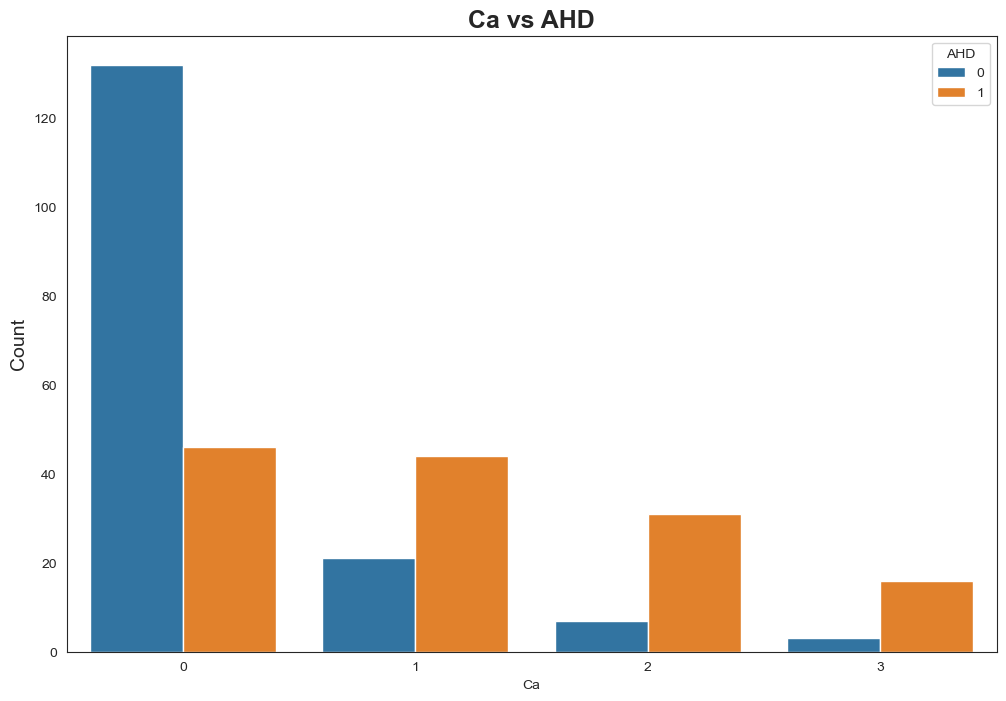

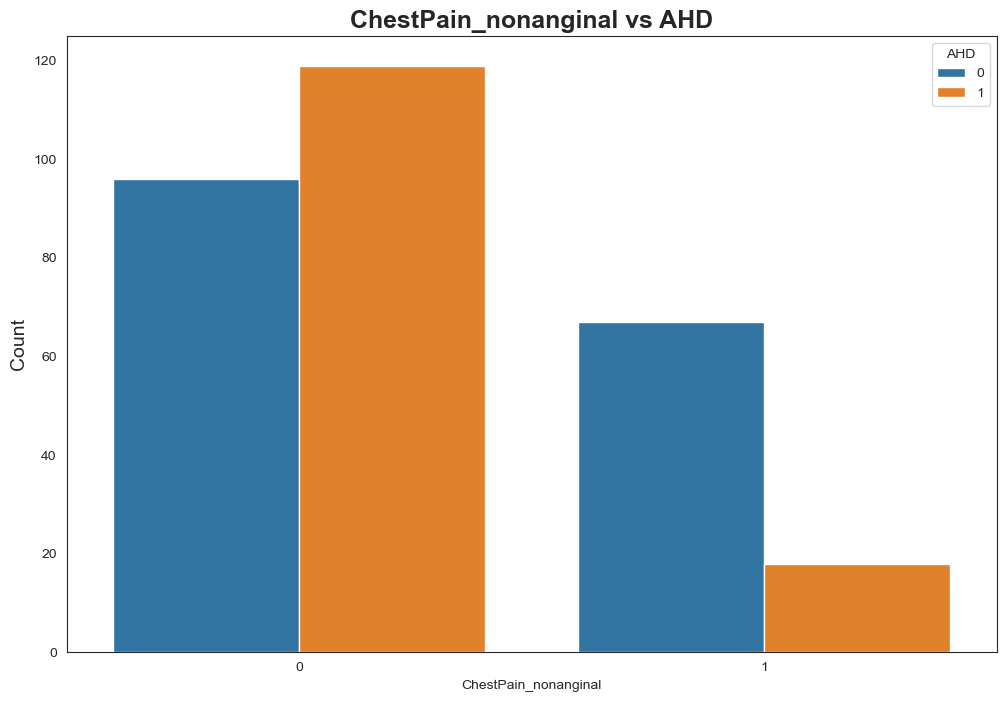

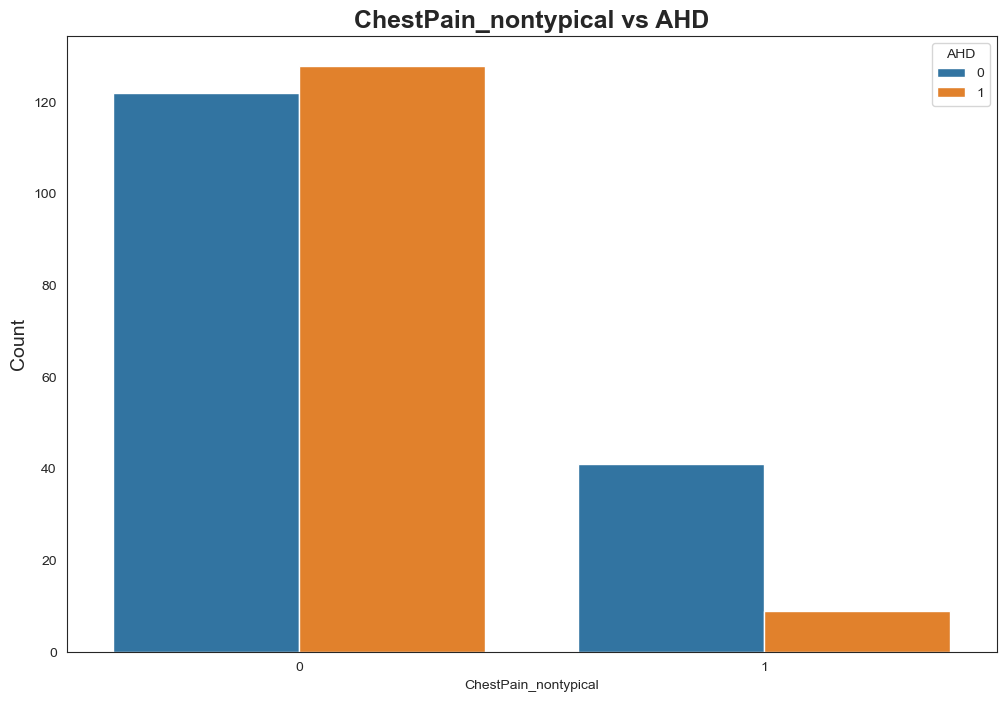

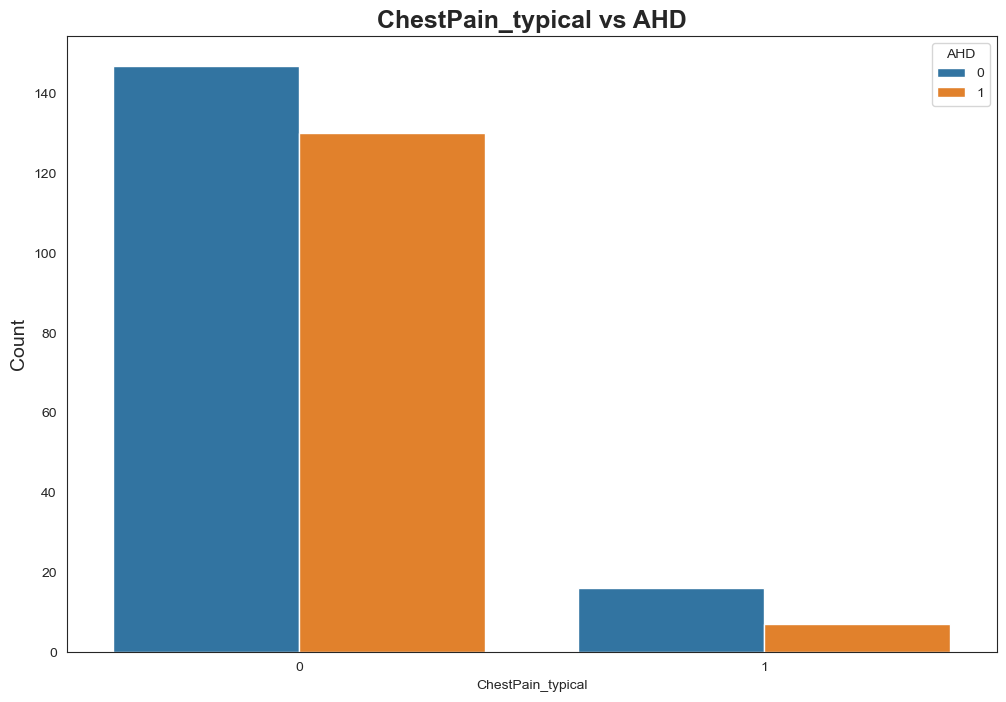

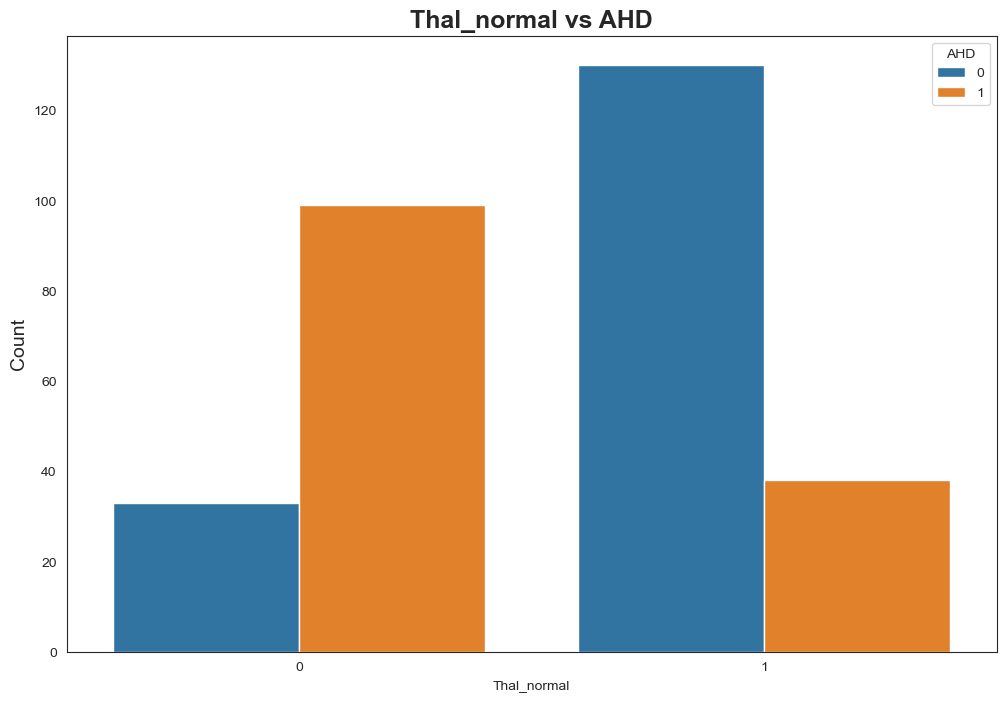

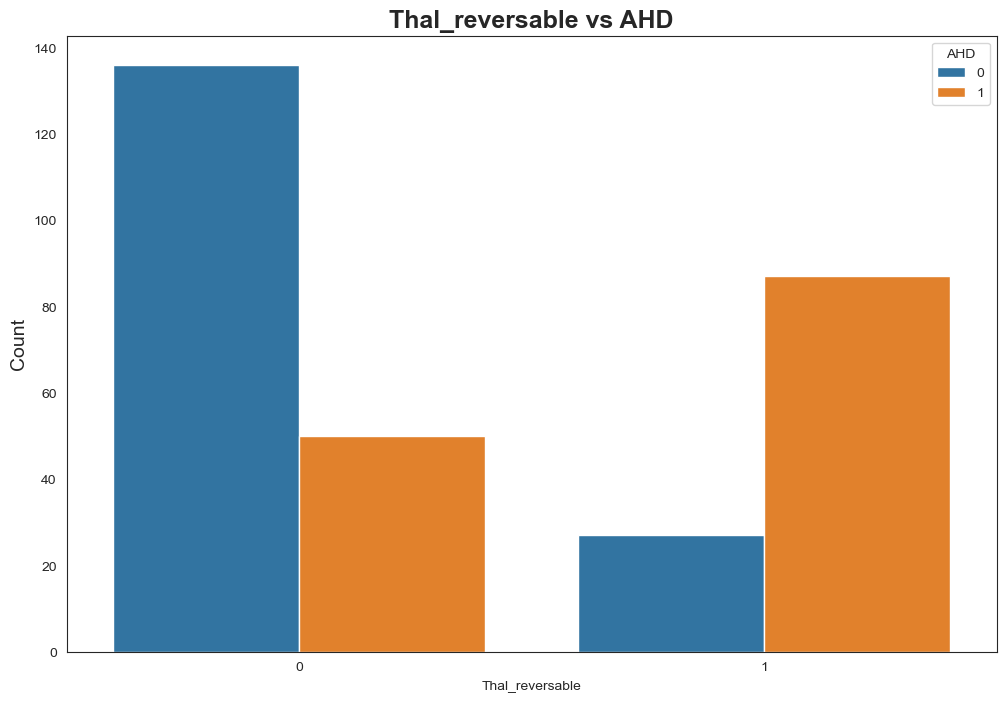

In [25]:
for i in Cat_variables:
    plt.figure(figsize=(12, 8))
    
    sns.countplot(x= i, hue='AHD', data=df)
    
    plt.title(i + ' vs AHD', fontsize = 18, weight = 'bold')
    
    plt.ylabel(i , fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    
    plt.show()

All variables appear to exhibit some form of relationship with the target variable, as evident from comparing the countplots of the two categories. However, the variables "Sex", "Fbs", and "Chestpain" appear to be the most significant in terms of their relationship with the target variable.

### 3.6 CORRELATION MATRIX

Let's further examine the correlations.

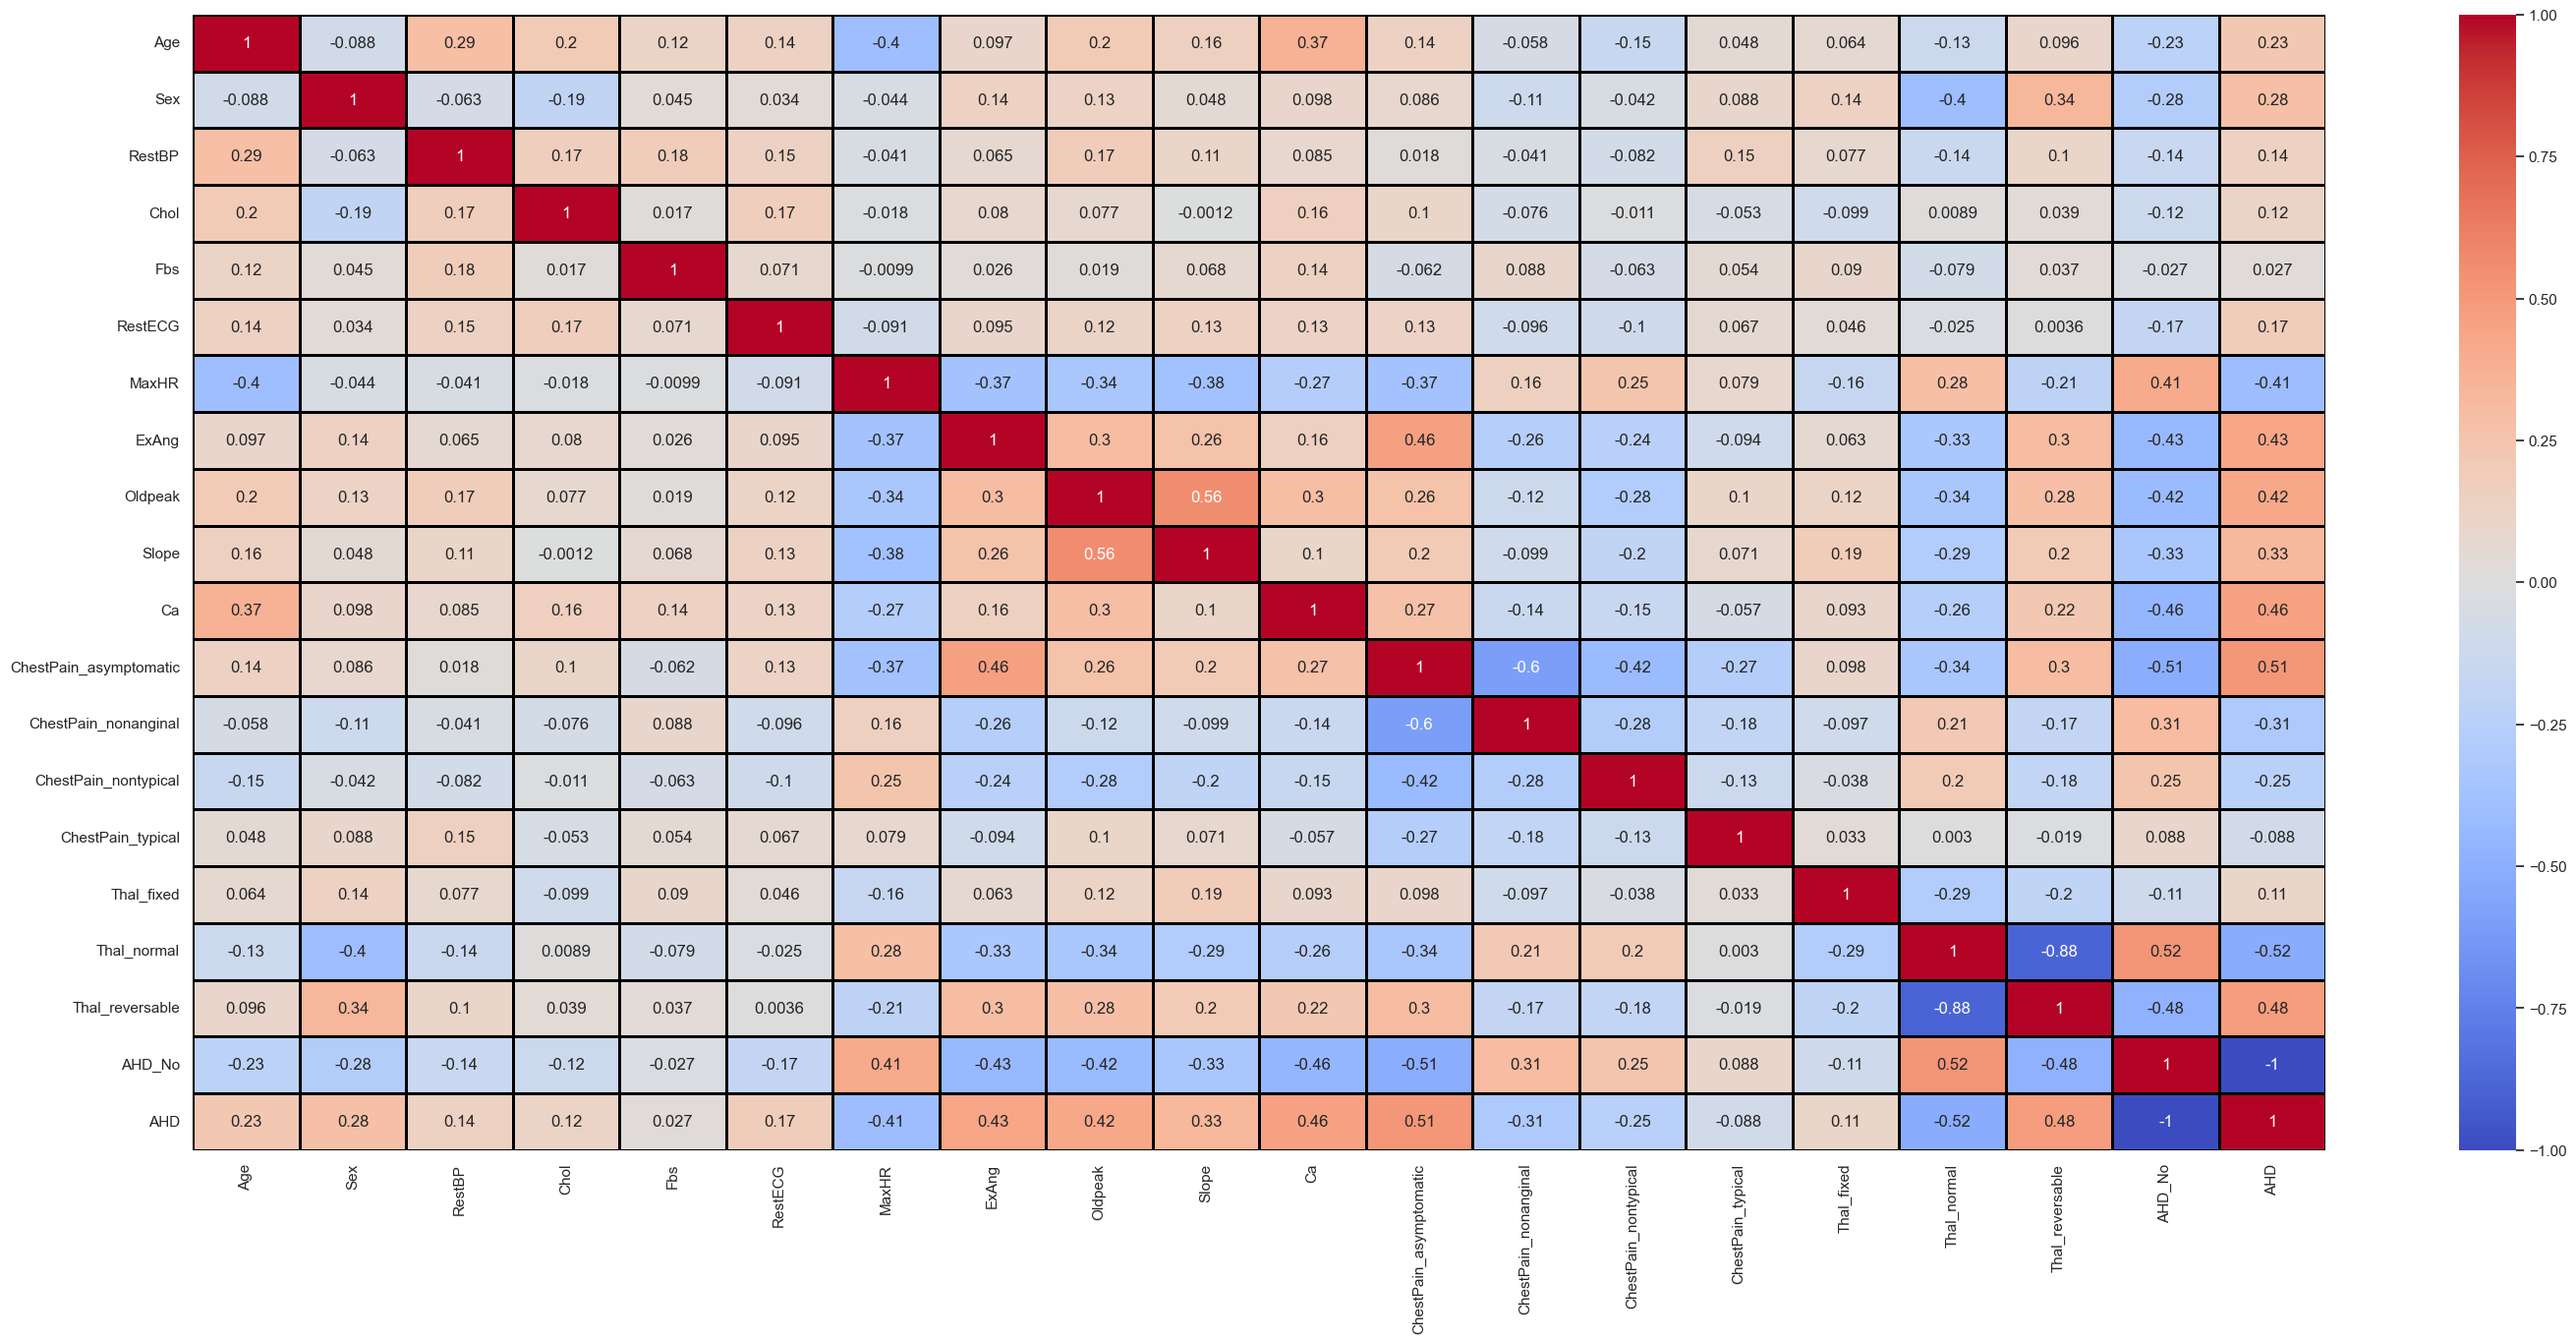

In [26]:
# Function that displays correlation matrix

def display_corr(dataframe):
    sns.set(rc = {'figure.figsize':(35,15)})
    sns.heatmap(data = dataframe.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')

display_corr(df)

* According to the correlation matrix, there are some variables that are highly correlated. In order to not fall into the dummy variable trap and decrease the maximum correlations in the dataset, we will delete some columns.

* We keep the columns that correlate highly with the target

In [27]:
# Deleting variables with high correlations
df = df.drop(columns = ["AHD_No", "ChestPain_nonanginal", "Thal_reversable"])

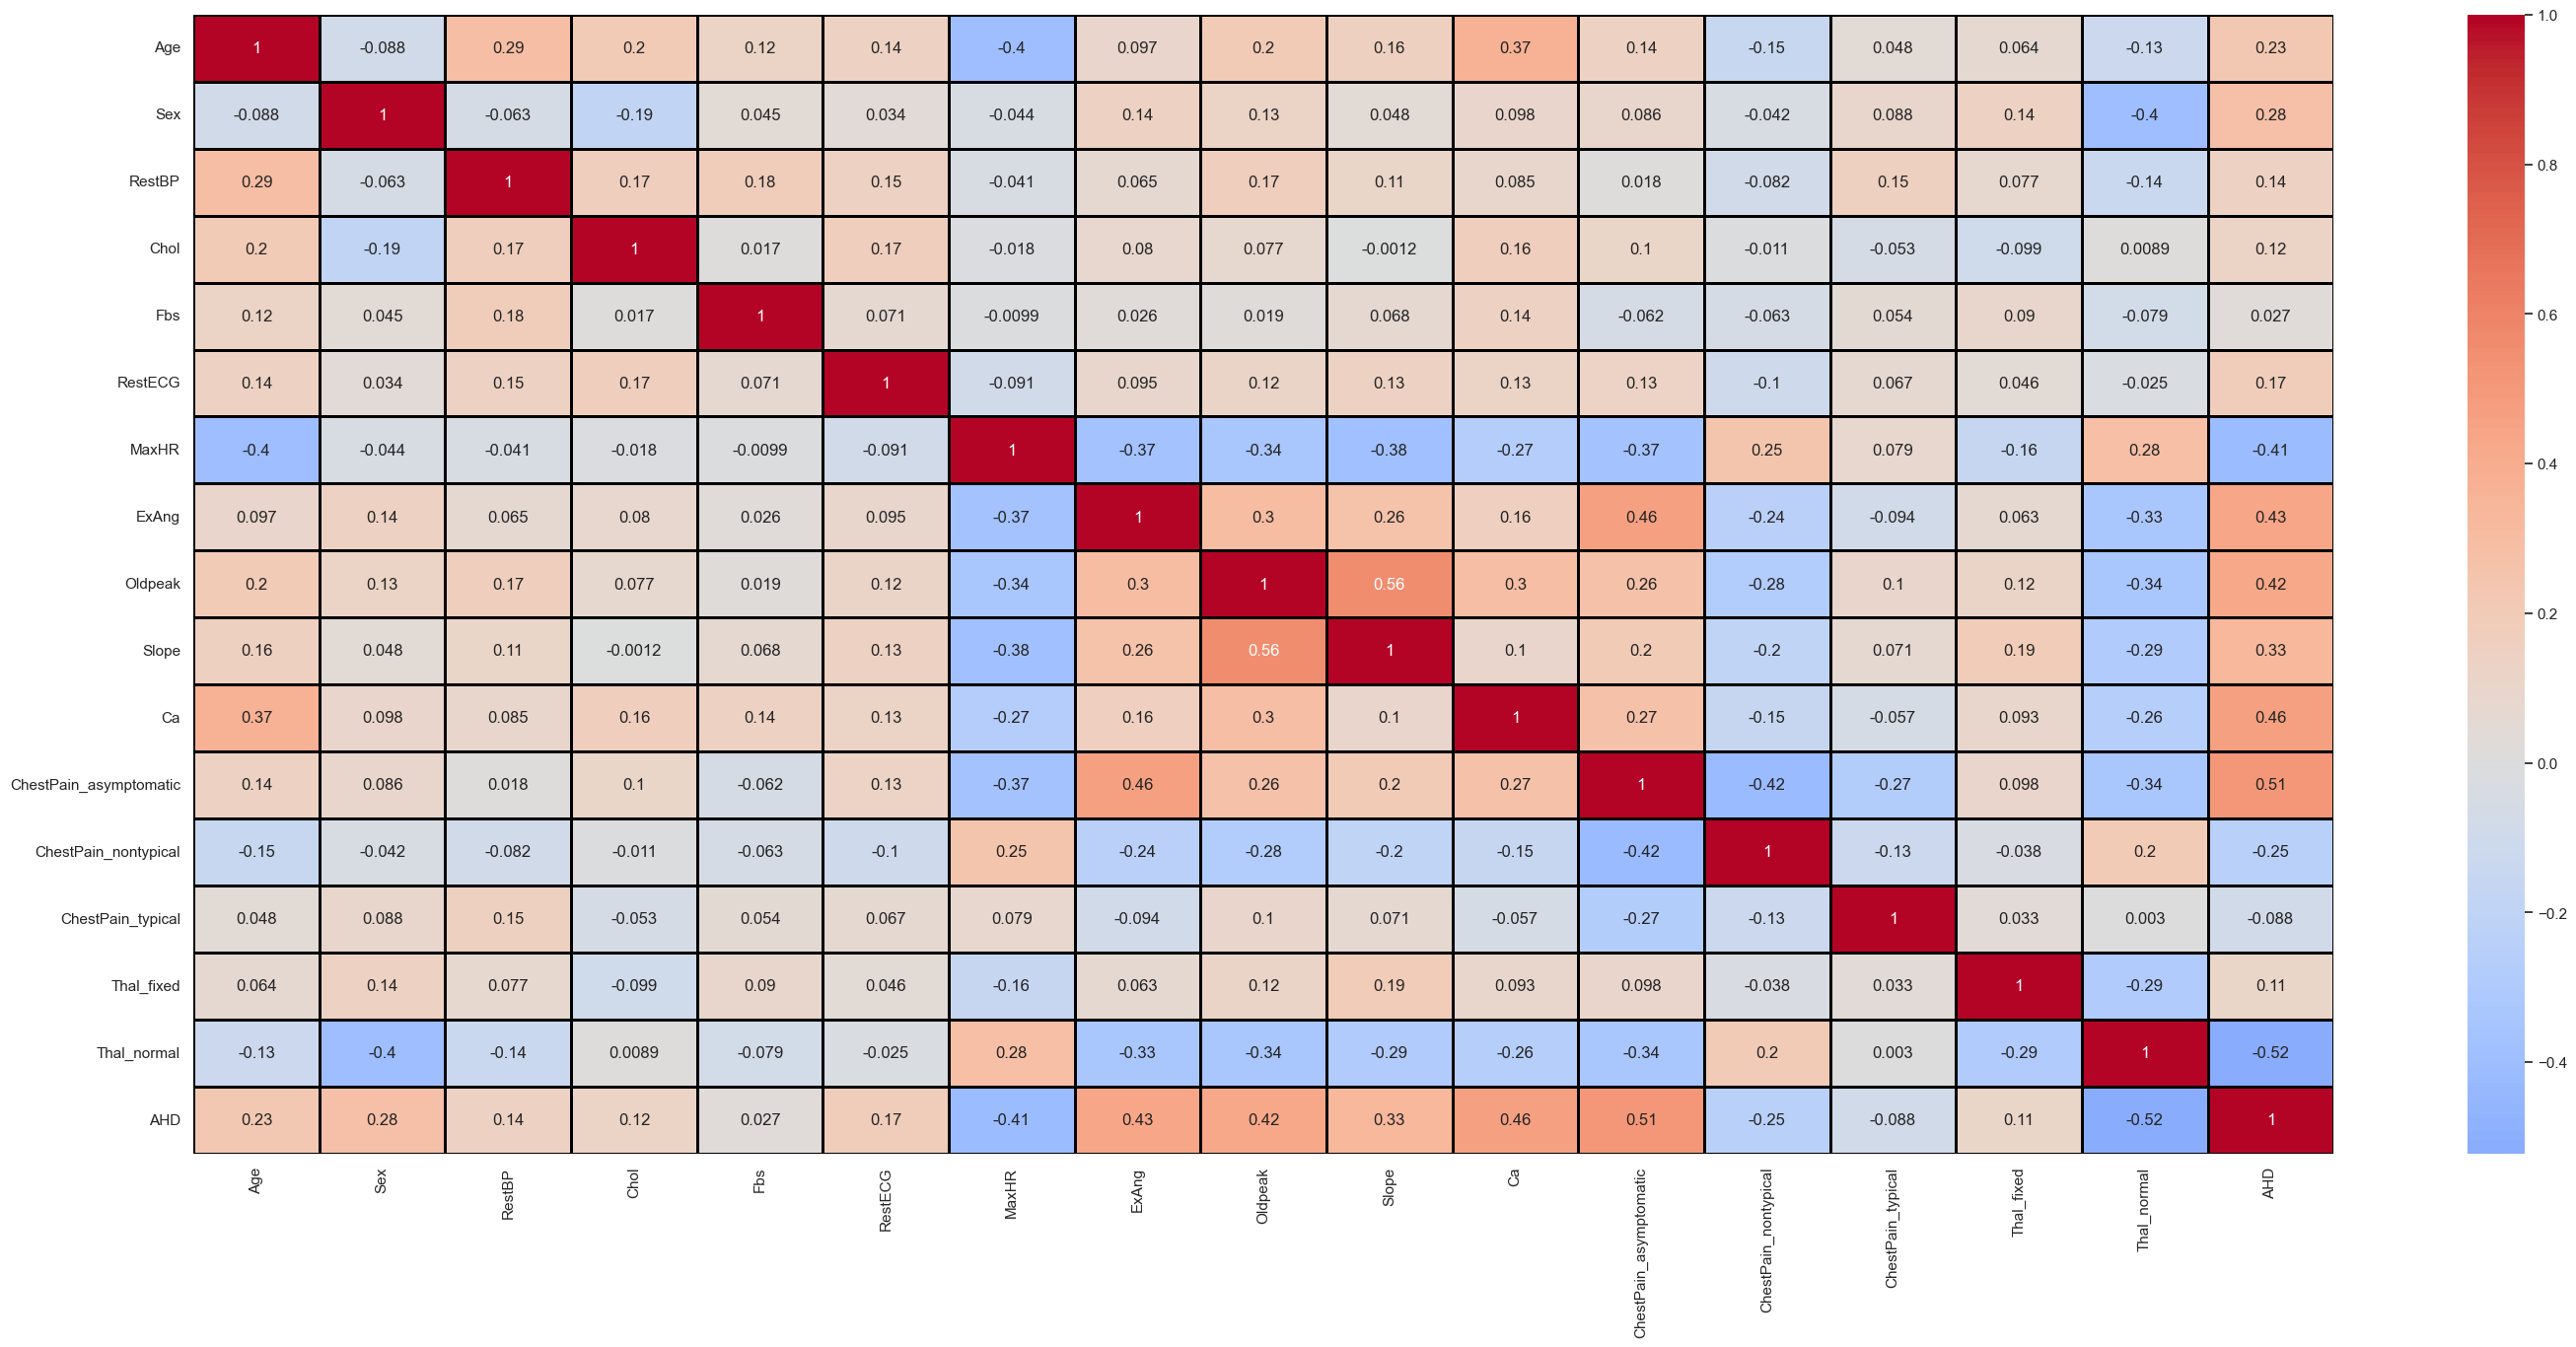

In [28]:
display_corr(df)

### 3.7 TRAIN-TEST SPLIT

Lastly we will split the dataset into a train dataset and a test dataset.

In [29]:
# First we shuffle the dataframe
df = df.sample(axis= 0, frac = 1, random_state=126)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,AHD
230,66,1,112,212,0,2,132,1,0.1,1,1,1,0,0,0,1,1
253,64,1,128,263,0,0,105,1,0.2,2,1,1,0,0,0,0,0
231,52,0,136,196,0,2,169,0,0.1,2,0,0,0,0,0,1,0
203,57,1,150,126,1,0,173,0,0.2,1,1,0,0,0,0,0,0
3,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,0,1


In [30]:
# Approximately the 15% of the dataset
test_df = df[0:45]

In [31]:
train_df = df[45:]

In [32]:
# Saving the datasets
test_df.to_csv(r'test_dataset.csv', index=False)
train_df.to_csv(r'train_dataset.csv', index=False)